In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [52]:
district = pd.read_csv('Edu/districts.csv')
income = pd.read_csv('Income/kaggle_income.csv')
state = pd.read_csv('Edu/states.csv')

In [53]:
income = income[income['State_Name'] == 'Michigan']
district = district[district['STATE'] == 'Michigan']
#state = state[state['YEAR'] == 2016]

In [54]:
school_districts = district['NAME'].unique().tolist()
counties = income['County'].unique().tolist()
cities = income['City'].unique().tolist()
years = state['YEAR'].unique().tolist()

In [60]:
school_counties = []
count = 0
for c in counties:
    count0 = count
    temp = c.split()
    if 'County' in c or 'Borough' in c or 'Municipio' in c or 'Parish' in c or 'Municipality' in c:
        for e in school_districts:
            name_string = ' '.join(temp[:-1])
            if name_string.upper() in e and e not in school_counties:
#                 print(name_string)
                school_counties.append((c, e))
                count = count0 + 1
    elif 'Census Area' in c:
        for e in school_districts:
            name_string = ' '.join(temp[:-2])
            if name_string.upper() in e and e not in school_counties:
#                 print(name_string)
                school_counties.append((c, e))
                count = count0 + 1
    elif 'Columbia' in c:
        for e in school_districts:
            name_string = 'Columbia'
            if name_string.upper() in e and e not in school_counties:
#                 print(name_string)
                school_counties.append((c, e))
                count = count0 + 1
    elif 'District' not in c:
        for e in school_districts:
            name_string = c
            if name_string.upper() in e and e not in school_counties:
#                 print(name_string)
                school_counties.append((c, e))
                count = count0 + 1
    else:
        continue

In [56]:
len(counties)

44

In [61]:
count

40

In [59]:
school_counties

[('Monroe County', 'MONROE SCH DIST'),
 ('Monroe County', 'MONROE INTERMEDIATE SCHOOL DIST'),
 ('Macomb County', 'MACOMB INTERMEDIATE SCHOOL DIST'),
 ('Macomb County', 'MACOMB ACADEMY'),
 ('Benzie County', 'BENZIE CO CENTRAL SCHOOLS'),
 ('Osceola County', 'OSCEOLA TWP SCH DIST'),
 ('Osceola County', 'MECOSTA OSCEOLA INTERMEDIATE SCHOOL DIST'),
 ('Osceola County', 'MECOSTA OSCEOLA INTERMEDIATE SCH'),
 ('Osceola County', 'MECOSTA OSCEOLA INTERMEDIATE SCHOOL'),
 ('Osceola County', 'MECOSTA OSCEOLA INTERMEDIATE'),
 ('Oakland County', 'OAKLAND INTERMEDIATE SCHOOL DIST'),
 ('Oakland County', 'GVSU - OAKLAND ACADEMY'),
 ('Oakland County', 'EMU - EDISON OAKLAND ACADEMY'),
 ('Oakland County', 'SVSU - OAKLAND INTERNATIONAL ACADEMY'),
 ('Oakland County', 'EMU-EDISON OAKLAND ACADEMY'),
 ('Oakland County', 'SVSU-OAKLAND INTERNATIONAL ACADEMY'),
 ('Oakland County', 'EMU - EDISION-OAKLAND ACADEMY'),
 ('Tuscola County', 'TUSCOLA INTERMEDIATE SCHOOL DIST'),
 ('Mason County', 'MASON PUBLIC SCHOOLS 11'),

In [49]:
count = 0
for c in counties:
    if 'County' in c:
        
        count += 1
    elif 'Census Area' in c:
        
        count += 1
    elif 'Borough' in c:
        
        count += 1
    elif 'Municipio' in c:
        
        count += 1
    elif 'Parish' in c:
        
        count += 1
    elif 'Municipality' in c:
        
        count += 1
    elif 'Columbia' in c:
        count += 1
    elif 'District' not in c:
        print(c)
        count += 1
    else:
        print(c)
count

District of
Muscogee
Deer Lodge
Manassas
Richmond
Waynesboro
Winchester


1132

In [40]:
len(counties)

1133

In [22]:
len(school_counties)

20662

In [23]:
len(school_districts)

27622

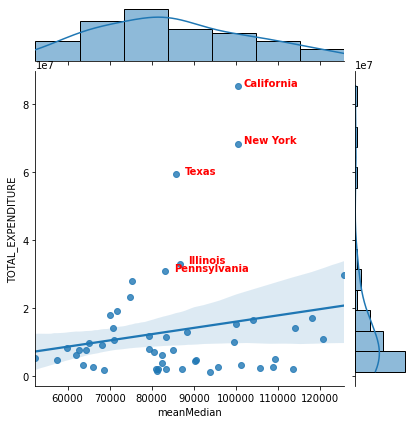

In [268]:
dfq3 = pd.read_csv('Problem1.csv')

# plt.scatter(dfq3['meanMedian'], dfq3['TOTAL_EXPENDITURE'])
g = sns.jointplot(data=dfq3, x='meanMedian',y='TOTAL_EXPENDITURE', kind="reg")

model = sm.OLS(dfq3.TOTAL_EXPENDITURE, dfq3.meanMedian)
dfq3['resid'] = model.fit().resid

head = dfq3.sort_values(by=['resid'], ascending=[False]).head(5)

def ann(row):
    r = row[1]
    x = -145 * (0.98-(r["meanMedian"]/1e4 - 5) / 8)
    y = r["TOTAL_EXPENDITURE"]
    plt.text(x, y, r['STATE'], horizontalalignment='left', size='medium', color='red', weight='semibold')

for row in head.iterrows():
    ann(row)
    
plt.savefig('Problem1.jpeg')

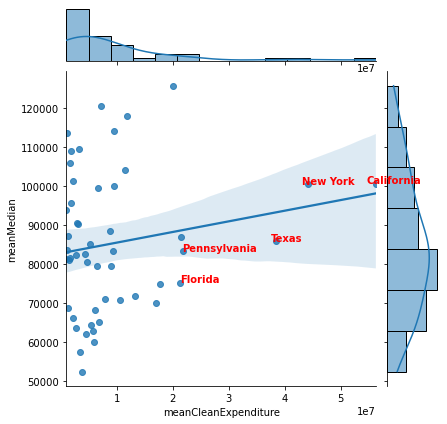

In [269]:
dfq5 = pd.read_csv('Problem2_01.csv')
# plt.scatter(dfq5['meanCleanExpenditure'], dfq5['meanMedian'])
g = sns.jointplot(data=dfq5, x='meanCleanExpenditure',y='meanMedian', kind="reg")

model = sm.OLS(dfq5.meanCleanExpenditure, dfq5.meanMedian)
dfq5['resid'] = model.fit().resid

head = dfq5.sort_values(by=['resid'], ascending=[False]).head(5)

def ann(row):
    r = row[1]
    x = -82 * (1-(r["meanCleanExpenditure"]/1e7) / 6)
    y = r["meanMedian"]
    plt.text(x, y, r['state'], horizontalalignment='left', size='medium', color='red', weight='semibold')

for row in head.iterrows():
    ann(row)
    
plt.savefig('Problem2_01.jpeg')

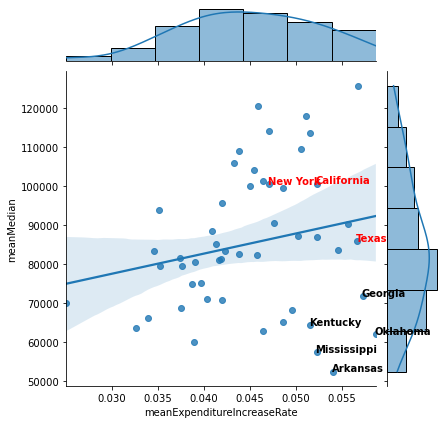

In [270]:
dfq6 = pd.read_csv('Problem2_02.csv')
# plt.scatter(dfq6['meanExpenditureIncreaseRate'], dfq6['meanMedian'])
g = sns.jointplot(data=dfq6, x='meanExpenditureIncreaseRate',y='meanMedian', kind="reg")

model = sm.OLS(dfq6.meanExpenditureIncreaseRate, dfq6.meanMedian)
dfq6['resid'] = model.fit().resid

head = dfq6.sort_values(by=['resid'], ascending=[False]).head(5)
# outliers = dfq6.loc[(dfq6['meanExpenditureIncreaseRate'] > 0.050) & (dfq6['meanMedian'] < 8e4)]
p1pre = dfq6.loc[(dfq6['state'] == 'New York') | (dfq6['state'] == 'California') | (dfq6['state'] == 'Texas')]

def ann(row, flag):
    r = row[1]
    x = -82 * (1-(r["meanExpenditureIncreaseRate"]*100 - 2.5) / 3.5)
    y = r["meanMedian"]
    if flag == 1:
        plt.text(x, y, r['state'], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        plt.text(x, y, r['state'], horizontalalignment='left', size='medium', color='red', weight='semibold')


for row in head.iterrows():
    ann(row, 1)
for row in p1pre.iterrows():
    ann(row, 0)
    
plt.savefig('Problem2_02.jpeg')

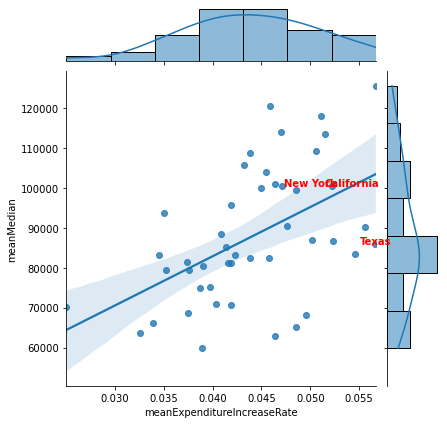

In [271]:
# drop the five states above
dfq6_dropped = dfq6.sort_values(by=['resid'], ascending=[False]).iloc[5: , :]
g = sns.jointplot(data=dfq6_dropped, x='meanExpenditureIncreaseRate',y='meanMedian', kind="reg")

p1pre = dfq6.loc[(dfq6['state'] == 'New York') | (dfq6['state'] == 'California') | (dfq6['state'] == 'Texas')]

def ann(row, flag):
    r = row[1]
    x = -82 * (1-(r["meanExpenditureIncreaseRate"]*100 - 2.5) / 3.5)
    y = r["meanMedian"]
    if flag == 1:
        plt.text(x, y, r['state'], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        plt.text(x, y, r['state'], horizontalalignment='left', size='medium', color='red', weight='semibold')


for row in p1pre.iterrows():
    ann(row, 0)
    
plt.savefig('Problem2_03.jpeg')

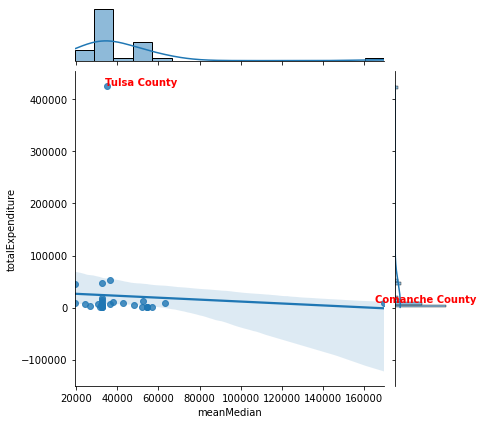

In [272]:
dfq9 = pd.read_csv('Problem3_01.csv')

g = sns.jointplot(data=dfq9, x='meanMedian',y='totalExpenditure', kind="reg")

model = sm.OLS(dfq9.totalExpenditure, dfq9.meanMedian)
dfq9['resid'] = model.fit().resid

head = dfq9.sort_values(by=['resid'], ascending=[False]).head(1)
tail = dfq9.sort_values(by=['resid'], ascending=[False]).tail(1)

def ann(row):
    r = row[1]
    x = -107 * (1-(r["meanMedian"]/1e4 - 2) / 16)
    y = r["totalExpenditure"] + 1000
    plt.text(x, y, r['county'], horizontalalignment='left', size='medium', color='red', weight='semibold')

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)
    
plt.savefig('Problem3_01.jpeg')

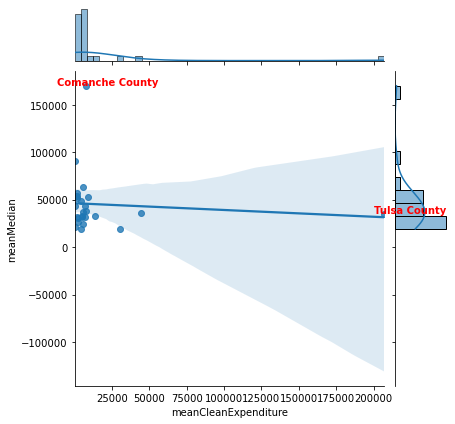

In [273]:
dfq10 = pd.read_csv('Problem3_02.csv')

g = sns.jointplot(data=dfq10, x='meanCleanExpenditure',y='meanMedian', kind="reg")

model = sm.OLS(dfq10.meanCleanExpenditure, dfq10.meanMedian)
dfq10['resid'] = model.fit().resid

head = dfq10.sort_values(by=['resid'], ascending=[False]).head(1)
tail = dfq10.sort_values(by=['resid'], ascending=[False]).tail(1)

def ann(row):
    r = row[1]
    x = -69 * (1-(r["meanCleanExpenditure"]/1e4 - 2) / 20)
    y = r["meanMedian"] + 1000
    plt.text(x, y, r['county'], horizontalalignment='left', size='medium', color='red', weight='semibold')

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)
    
plt.savefig('Problem3_02.jpeg')

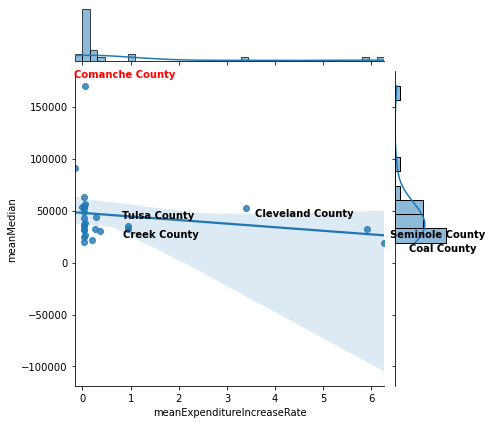

In [279]:
dfq11 = pd.read_csv('Problem3_03.csv')

g = sns.jointplot(data=dfq11, x='meanExpenditureIncreaseRate',y='meanMedian', kind="reg")

model = sm.OLS(dfq11.meanExpenditureIncreaseRate, dfq11.meanMedian)
dfq11['resid'] = model.fit().resid

head = dfq11.sort_values(by=['resid'], ascending=[False]).head(5)
pre = dfq11.loc[(dfq11['county'] == 'Comanche County')]

def ann(row, flag):
    r = row[1]
    x = -70 * (1-(r["meanExpenditureIncreaseRate"]) / 6)
    y = r["meanMedian"]
    if r['county'] == 'Tulsa County':
        y = y + 8000
        plt.text(x, y, r['county'], horizontalalignment='left', size='medium', color='black', weight='semibold')
    elif flag == 1:
        y = y - 8000
        plt.text(x, y, r['county'], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        y = y + 8000
        plt.text(x, y, r['county'], horizontalalignment='left', size='medium', color='red', weight='semibold')


for row in head.iterrows():
    ann(row, 1)
for row in pre.iterrows():
    ann(row, 0)
    
plt.savefig('Problem3_03.jpeg')

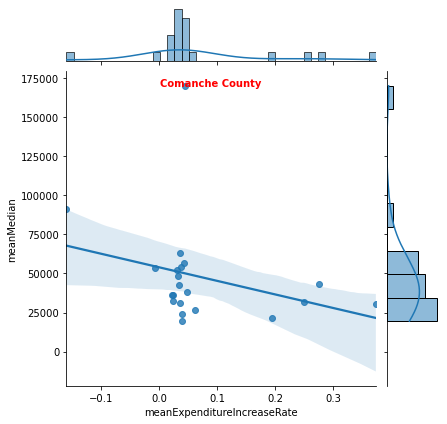

In [281]:
# drop the five states above
dfq11_dropped = dfq11.sort_values(by=['resid'], ascending=[False]).iloc[5: , :]
g = sns.jointplot(data=dfq11_dropped, x='meanExpenditureIncreaseRate',y='meanMedian', kind="reg")

pre = dfq11.loc[(dfq11['county'] == 'Comanche County')]
def ann(row, flag):
    r = row[1]
    x = -82 * (1-(r["meanExpenditureIncreaseRate"]*100 - 2.5) / 3.5)
    y = r["meanMedian"]
    if flag == 1:
        plt.text(x, y, r['county'], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        plt.text(x, y, r['county'], horizontalalignment='left', size='medium', color='red', weight='semibold')


for row in pre.iterrows():
    ann(row, 0)
    
plt.savefig('Problem3_04.jpeg')

In [252]:
head

,county,meanExpenditureIncreaseRate,meanMedian,resid
7,Coal County,6.264463,19225.0,6.111494
23,Seminole County,5.911185,32259.0,5.654507
6,Cleveland County,3.399268,52368.0,2.982588
9,Creek County,0.951933,32440.0,0.693815


In [253]:
pre

,county,meanExpenditureIncreaseRate,meanMedian,resid
8,Comanche County,0.044757,170004.0,-1.307925
25,Tulsa County,0.939695,34950.0,0.661606
